NLP Assignment 1
Cris Pineda

**Data Exploration**

In [3]:
from __future__ import division

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
import itertools

#from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
#from sklearn import decomposition, ensemble, metrics
import sklearn_crfsuite
import eli5

import warnings
warnings.filterwarnings("ignore")

import string

Import the two data sets (train and test) and name them 'train' and 'test'

In [4]:
train = pd.read_csv('fake_or_real_news_training.csv', index_col=0)
test = pd.read_csv('fake_or_real_news_test.csv', index_col=0)

Print the first 10 observations of the train set and their dimensions to take a look at the data

In [5]:
print("Train Shape:", train.shape, "\n Test Shape:", test.shape)
train.head(10)

Train Shape: (3999, 5) 
 Test Shape: (2321, 2)


,title,text,label,X1,X2
ID,,,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,NaN,NaN
6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,NaN,NaN
7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,NaN,NaN
95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,NaN,NaN
4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,NaN,NaN


Take a look at the 'text' variable: we can see it's the beginning of the article itself 

In [6]:
train['text'][:10] 

ID
8476     Daniel Greenfield, a Shillman Journalism Fello...
10294    Google Pinterest Digg Linkedin Reddit Stumbleu...
3608     U.S. Secretary of State John F. Kerry said Mon...
10142    — Kaydee King (@KaydeeKing) November 9, 2016 T...
875      It's primary day in New York and front-runners...
6903       \nI’m not an immigrant, but my grandparents ...
7341     Share This Baylee Luciani (left), Screenshot o...
95       A Czech stockbroker who saved more than 650 Je...
4869     Hillary Clinton and Donald Trump made some ina...
2909     Iranian negotiators reportedly have made a las...
Name: text, dtype: object

Also, the data does not seem to be in ordered in any way so we can avoid shuffling the data to avoid any bias. There seems to be some text leakage into the X1 columns so we will fix that first.

In [7]:
bad_data = train.loc[train['X1'].notnull()]
print(bad_data.shape)
bad_data.head(33)

(33, 5)


,title,text,label,X1,X2
ID,,,,,
599,Election Day: No Legal Pot In Ohio,Democrats Lose In The South,Election Day: No Legal Pot In Ohio; Democrats ...,REAL,NaN
10194,Who rode it best? Jesse Jackson mounts up to f...,Leonardo DiCaprio to the rescue?,Who rode it best? Jesse Jackson mounts up to f...,FAKE,NaN
356,Black Hawk crashes off Florida,human remains found,(CNN) Thick fog forced authorities to suspend ...,REAL,NaN
2786,Afghanistan: 19 die in air attacks on hospital,U.S. investigating,(CNN) Aerial bombardments blew apart a Doctors...,REAL,NaN
3622,Al Qaeda rep says group directed Paris magazin...,US issues travel warning,A member of Al Qaeda's branch in Yemen said Fr...,REAL,NaN
7375,Shallow 5.4 magnitude earthquake rattles centr...,shakes buildings in Rome,00 UTC © USGS Map of the earthquake's epicent...,FAKE,NaN
9097,ICE Agent Commits Suicide in NYC,Leaves Note Revealing Gov’t Plans to Round-up...,Email Print After writing a lengthy suicide no...,FAKE,NaN
9203,Political Correctness for Yuengling Brewery,What About Our Opioid Epidemic?,We Are Change \n\nIn today’s political climate...,FAKE,NaN
1602,Poll gives Biden edge over Clinton against GOP...,VP meets with Trumka,A new national poll shows Vice President Biden...,REAL,NaN


In [8]:
# fix the errors
bad_data.text = bad_data.iloc[:,2]
bad_data.label = bad_data.iloc[:,3]
bad_data.loc[9,'label'] = 'REAL'
bad_data.loc[6268,'label'] = 'FAKE'
bad_data.drop(['X1', 'X2'], axis=1, inplace=True)
bad_data.columns = ['title', 'text', 'label']
bad_data.head(33)

,title,text,label
ID,,,
599,Election Day: No Legal Pot In Ohio,Election Day: No Legal Pot In Ohio; Democrats ...,REAL
10194,Who rode it best? Jesse Jackson mounts up to f...,Who rode it best? Jesse Jackson mounts up to f...,FAKE
356,Black Hawk crashes off Florida,(CNN) Thick fog forced authorities to suspend ...,REAL
2786,Afghanistan: 19 die in air attacks on hospital,(CNN) Aerial bombardments blew apart a Doctors...,REAL
3622,Al Qaeda rep says group directed Paris magazin...,A member of Al Qaeda's branch in Yemen said Fr...,REAL
7375,Shallow 5.4 magnitude earthquake rattles centr...,00 UTC © USGS Map of the earthquake's epicent...,FAKE
9097,ICE Agent Commits Suicide in NYC,Email Print After writing a lengthy suicide no...,FAKE
9203,Political Correctness for Yuengling Brewery,We Are Change \n\nIn today’s political climate...,FAKE
1602,Poll gives Biden edge over Clinton against GOP...,A new national poll shows Vice President Biden...,REAL


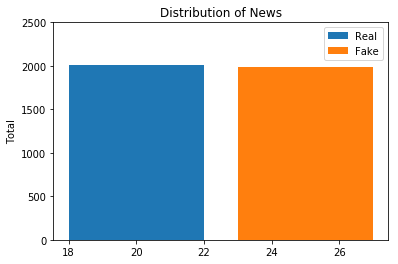

In [9]:
train = train.drop(['X1', 'X2'], axis=1) # drop X1 and X2 so we can replace
train.loc[bad_data.index] = bad_data # replace

# extracting the number of examples of each class
real = train[train['label'] == 'REAL'].shape[0]
fake = train[train['label'] == 'FAKE'].shape[0]

# bar plot of the 3 classes
plt.bar(20,real,4, label="Real")
plt.bar(25,fake,4, label="Fake")
plt.ylim(0, 2500)
plt.legend()
plt.ylabel('Total')
plt.title('Distribution of News')
plt.show()

It looks to be equally distributed between real and fake news.

Next, we need to merge the title and text column.

In [10]:
label = train['label']
#test_id = test['ID'] # save
train = train.drop(['label'], axis=1)

train = train.apply(lambda x: " ".join(x), axis=1)
test = test.apply(lambda x: " ".join(x), axis=1)

# save back to DF
train = pd.DataFrame(train)
train.columns = ['text'] # re-insert column name
test = pd.DataFrame(test)
test.columns = ['text']

train['label'] = label
train.head()

,text,label
ID,,
8476,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
3608,Kerry to go to Paris in gesture of sympathy U....,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,FAKE
875,The Battle of New York: Why This Primary Matte...,REAL


We can check the Lexical Diversity for each document which is stored in an array, showing the percentage of unique words over the total words in each data set

In [11]:
def lexical_diversity(df, row):
    '''function to find the lexical diversity on a given row'''
    return len(set(df.iloc[0, row])) / len(df.iloc[0, row])

# view the first row
print("Train Lexical Diversity: %1.4f" %lexical_diversity(train, 0),
      "\nTest Set Lexical Diversity: %1.4f" %lexical_diversity(test, 0))

Train Lexical Diversity: 0.0078 
Test Set Lexical Diversity: 0.0859


We will try two different approaches. First, we will transform the text by removing punctuation, tokenizing, stemming and see how our model performs. Second, we will do all the transformations through the vectorizer functions since it is much easier. We will see which performs better and move from there. I will not use tagging since it was really difficult to implement and might not be too intuitive.

**Transforming the Data**

First, lets remove the punctuation.

In [12]:
def remove_punctuation(df):
    '''function to remove punctuation''' 
    translator = str.maketrans('', '', string.punctuation)
    return df.translate(translator)

new_train = train.copy()
new_test = test.copy()

new_train['text'] = new_train['text'].apply(remove_punctuation)
new_test['text'] = new_test['text'].apply(remove_punctuation)
new_train.head()

,text,label
ID,,
8476,You Can Smell Hillary’s Fear Daniel Greenfield...,FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE
3608,Kerry to go to Paris in gesture of sympathy US...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,FAKE
875,The Battle of New York Why This Primary Matter...,REAL


In [13]:
# create a function to count
from sklearn.feature_extraction.text import CountVectorizer

def get_counts(df):
    ''' function to get total counts'''
    vectorizer = CountVectorizer()
    counts = vectorizer.fit_transform(df.text) 
    return len(vectorizer.get_feature_names())

print("Train Tokens: {}, Test Tokens: {}".format(get_counts(new_train), get_counts(new_test)))

Train Tokens: 67340, Test Tokens: 52766


Now we will remove all the english stopwords since most are just noise.

In [14]:
import nltk
from nltk.corpus import stopwords

sw = stopwords.words('english') # although some of the text is not in english, most are

def stopwords(text):
    '''function for removing the stopword'''
    text = [word for word in text.split() if word.lower() not in sw]
    return " ".join(text)

new_train['text'] = new_train['text'].apply(stopwords)
new_test['text'] = new_test['text'].apply(stopwords)

print("Train Tokens: {}, Test Tokens: {}".format(get_counts(new_train), get_counts(new_test)))
new_train.head()

Train Tokens: 67338, Test Tokens: 52762


,text,label
ID,,
8476,Smell Hillary’s Fear Daniel Greenfield Shillma...,FAKE
10294,Watch Exact Moment Paul Ryan Committed Politic...,FAKE
3608,Kerry go Paris gesture sympathy US Secretary S...,REAL
10142,Bernie supporters Twitter erupt anger DNC trie...,FAKE
875,Battle New York Primary Matters primary day Ne...,REAL


Next, we will tokenize with white spaces and then use the word net lemmatizer.

In [15]:
from nltk.tokenize import RegexpTokenizer

lemmatizer = nltk.stem.WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

def lemmatize_text(text):
    '''function to tokenize and then lemmatize any word with length great than 1'''
    return [lemmatizer.lemmatize(w) for w in tokenizer.tokenize(text) if len(w) > 1]

new_train['text'] = new_train['text'].apply(lemmatize_text)
new_test['text'] = new_test['text'].apply(lemmatize_text)

new_train.head()

,text,label
ID,,
8476,"[Smell, Hillary, Fear, Daniel, Greenfield, Shi...",FAKE
10294,"[Watch, Exact, Moment, Paul, Ryan, Committed, ...",FAKE
3608,"[Kerry, go, Paris, gesture, sympathy, US, Secr...",REAL
10142,"[Bernie, supporter, Twitter, erupt, anger, DNC...",FAKE
875,"[Battle, New, York, Primary, Matters, primary,...",REAL


We tried using both the SnowballStemmer and PorterStemmer. PorterStemmer worked a little better but there was not much of a difference so we will go with that one. Here is the code for the SnowballStemmer just for your information.

In [16]:
stemmer = nltk.PorterStemmer()

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(str(word)) for word in text]
    return " ".join(text) 

new_train['text'] = new_train['text'].apply(stemming)
new_test['text'] = new_test['text'].apply(stemming)

new_train.head()

,text,label
ID,,
8476,smell hillari fear daniel greenfield shillman ...,FAKE
10294,watch exact moment paul ryan commit polit suic...,FAKE
3608,kerri go pari gestur sympathi US secretari sta...,REAL
10142,berni support twitter erupt anger dnc tri warn...,FAKE
875,battl new york primari matter primari day new ...,REAL


We can separate the data between real and fake news to gain some insights.

In [17]:
real_news = train.loc[train['label'] == 'REAL']
real_label = real_news['label']

fake_news = train.loc[train['label'] == 'FAKE']
fake_label = fake_news['label']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_train['text'], label, test_size=0.3, random_state=69)

X_train.shape

(2799,)

**Encoding**

Here we will try the count_vectorizer. CountVectorizer tokenizes all the string, makes a note of all the words that appear and counts the number of times each token appears. 

In [19]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train) 
count_test = count_vectorizer.transform(X_test)

# print the feature names 
print(count_vectorizer.get_feature_names()[:20])
print("There are {} tokens in Count Vectorizer".format(len(count_vectorizer.get_feature_names())))

['00', '000', '0000', '00017b2908ff9fa45188d243fd49aaeeb2dhrcofficecom', '0002', '0007', '001', '0026', '005', '007', '007010', '01', '010', '01011984', '010608', '01112016', '012015', '015', '017', '017mile']
There are 40384 tokens in Count Vectorizer


We will evaluate our models by using a confusion matrix. I found a nice confusion matrix code from a Data Camp tutorial at https://www.datacamp.com/community/tutorials/scikit-learn-fake-news.

In [22]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix'):
    '''function to plot a confusion matrix'''
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

Here, we will use Naive Bayes model to test the Count Vectorizer.

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

m1 = MultinomialNB() 

m1.fit(count_train, y_train)
pred1 = m1.predict(count_test)
score1 = metrics.accuracy_score(y_test, pred1)
print("accuracy:   %0.3f" % score1)

accuracy:   0.890


In [24]:
# create these two functions for fitting and testing the model because we will be testing alot
def fit_model(train, test, model, cm=False):
    '''function to fit and apply model with the option to show Confusion Matrix'''
    model.fit(train, y_train)
    pred = model.predict(test)
    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)
    if cm:
        cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
        plot_confusion_matrix(cm, classes=['FAKE', 'REAL'], title='Confusion Matrix')
    
# create function for alpha
def find_alpha(X_train, X_test, model):
    '''function to find best alpha'''
    alphas = np.arange(0, 1, .1)
    best_score = 0
    for alpha in alphas:
        alpha_model = model(alpha=alpha)
        alpha_model.fit(X_train, y_train)
        pred = alpha_model.predict(X_test)
        score = metrics.accuracy_score(y_test, pred)
        if score > best_score:
            clf = alpha_model
        print("Alpha: {:.2f} Score: {:.6f}".format(alpha, score))

In [25]:
find_alpha(count_train, count_test, MultinomialNB)

Alpha: 0.00 Score: 0.872500
Alpha: 0.10 Score: 0.895833
Alpha: 0.20 Score: 0.896667
Alpha: 0.30 Score: 0.897500
Alpha: 0.40 Score: 0.899167
Alpha: 0.50 Score: 0.899167
Alpha: 0.60 Score: 0.895833
Alpha: 0.70 Score: 0.895000
Alpha: 0.80 Score: 0.894167
Alpha: 0.90 Score: 0.894167


In [26]:
m1 = MultinomialNB(alpha=0.1) 

fit_model(count_train, count_test, m1)

accuracy:   0.896


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.65)
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

# print the feature names 
print(tfidf_vectorizer.get_feature_names()[-20:]) # do last 20 since the first will match the previous vectorizer

['ťtwostateť', 'ťwho', 'ź50000', 'ελληνικά', 'октября', 'русский', 'эa', 'эin', 'эthe', 'яркий', 'آمریکا', 'ارزی', 'ایران', 'جنگ', 'سال', 'عربي', 'علیه', 'مطالعاتی', 'مورد', 'کدآمایی']


In [28]:
m2 = MultinomialNB()

fit_model(tfidf_train, tfidf_test, m2)

accuracy:   0.786


In [29]:
# lets try to find the right alpha
find_alpha(tfidf_train, tfidf_test, MultinomialNB)

Alpha: 0.00 Score: 0.874167
Alpha: 0.10 Score: 0.897500
Alpha: 0.20 Score: 0.882500
Alpha: 0.30 Score: 0.869167
Alpha: 0.40 Score: 0.846667
Alpha: 0.50 Score: 0.839167
Alpha: 0.60 Score: 0.826667
Alpha: 0.70 Score: 0.811667
Alpha: 0.80 Score: 0.804167
Alpha: 0.90 Score: 0.794167


accuracy:   0.897


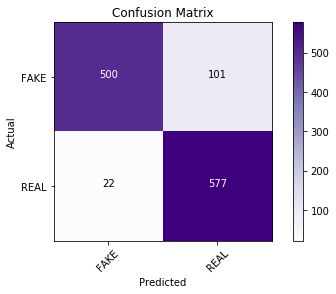

In [30]:
m2 = MultinomialNB(alpha=0.1)

fit_model(tfidf_train, tfidf_test, m2, cm=True)

In [31]:
from sklearn.feature_extraction.text import HashingVectorizer

hash_vectorizer = HashingVectorizer(non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

In [32]:
m3 = MultinomialNB()

fit_model(hash_train, hash_test, m3)

accuracy:   0.756


In [33]:
# lets try to find the right alpha
find_alpha(hash_train, hash_test, MultinomialNB)

Alpha: 0.00 Score: 0.877500
Alpha: 0.10 Score: 0.828333
Alpha: 0.20 Score: 0.807500
Alpha: 0.30 Score: 0.801667
Alpha: 0.40 Score: 0.789167
Alpha: 0.50 Score: 0.777500
Alpha: 0.60 Score: 0.773333
Alpha: 0.70 Score: 0.766667
Alpha: 0.80 Score: 0.765000
Alpha: 0.90 Score: 0.757500


accuracy:   0.912


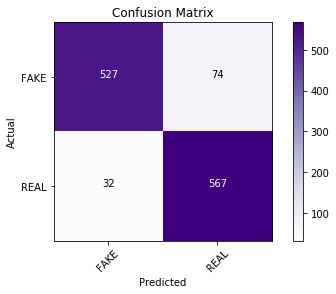

In [34]:
m3 = MultinomialNB(alpha=0.001)

fit_model(hash_train, hash_test, m3, cm=True)

These scores are pretty good. We have already surpassed our baseline of 90% accuracy. We will now try our second approach by applying all the transformations from the vectorizer parameters on the unaltered data set. We will evaluate what works better and pick a model to fine tune.

In [35]:
# Make training and test sets with original train data set
X_train, X_test, y_train, y_test = train_test_split(train['text'], label, test_size=0.3, random_state=69)

In [36]:
# tokenizers
white_space = '\\S+(?=\\s+)' # we will use white space tokenizer
alphanumeric = '[A-Za-z0-9]+(?=\\s+)'

# ngrams
unigrams = (1,1)
bigrams = (1,2)
trigrams = (1,3)

count_vectorizer = CountVectorizer(token_pattern=white_space, ngram_range=unigrams, analyzer='word') # unigrams and word analyzer
count_train = count_vectorizer.fit_transform(X_train) 
count_test = count_vectorizer.transform(X_test)

# print the feature names 
print(count_vectorizer.get_feature_names()[:20])
print("There are {} tokens in Count Vectorizer".format(len(count_vectorizer.get_feature_names())))

['!', '!!', '!!!', '!!!”', '!!?', '!”', '"', '""clearly', '"$100,000?', '"$50', '"$66', '"\'i', '"\'it\'s', '"\'stronger', '"\'the', '"\'unacceptable\'', '"(1)', '"(bush', '"(obama)', '"(republicans)']
There are 121720 tokens in Count Vectorizer


accuracy:   0.903


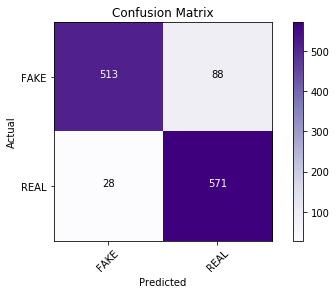

In [37]:
m4 = MultinomialNB() 

fit_model(count_train, count_test, m4, cm=True)

In [38]:
find_alpha(count_train, count_test, MultinomialNB)

Alpha: 0.00 Score: 0.894167
Alpha: 0.10 Score: 0.913333
Alpha: 0.20 Score: 0.914167
Alpha: 0.30 Score: 0.910000
Alpha: 0.40 Score: 0.907500
Alpha: 0.50 Score: 0.907500
Alpha: 0.60 Score: 0.907500
Alpha: 0.70 Score: 0.906667
Alpha: 0.80 Score: 0.904167
Alpha: 0.90 Score: 0.903333


accuracy:   0.914


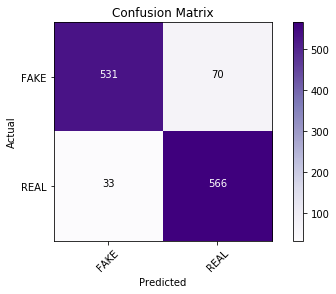

In [39]:
m4 = MultinomialNB(alpha=0.2) 

fit_model(count_train, count_test, m4, cm=True)

Already surpassed all our previous models. We will continue with the other vectorizers.

In [40]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.65, token_pattern=white_space, ngram_range=unigrams, analyzer='word') 
# use white space again
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

# print the feature names 
print(tfidf_vectorizer.get_feature_names()[-20:]) # do last 20 since the first will match the previous vectorizer

['……', '…….', '‹', '›', '€100,000', '€90', '₹1000', '₹500', '⅔', '→', '►', '♥', '✓', '\uf50d', '🇺🇸', '😀', '😂', '😉', '😳', '🙂']


In [41]:
m5 = MultinomialNB()

fit_model(tfidf_train, tfidf_test, m5)

accuracy:   0.779


In [42]:
# lets try to find the right alpha
find_alpha(tfidf_train, tfidf_test, MultinomialNB)

Alpha: 0.00 Score: 0.888333
Alpha: 0.10 Score: 0.906667
Alpha: 0.20 Score: 0.885833
Alpha: 0.30 Score: 0.853333
Alpha: 0.40 Score: 0.836667
Alpha: 0.50 Score: 0.828333
Alpha: 0.60 Score: 0.818333
Alpha: 0.70 Score: 0.805000
Alpha: 0.80 Score: 0.799167
Alpha: 0.90 Score: 0.787500


accuracy:   0.913


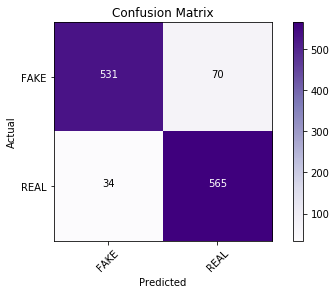

In [43]:
m5 = MultinomialNB(alpha=0.1)

fit_model(count_train, count_test, m5, cm=True)

In [44]:
hash_vectorizer = HashingVectorizer(non_negative=True, token_pattern=white_space, ngram_range=unigrams) #ngrams perform worse
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

In [45]:
m6 = MultinomialNB()

fit_model(hash_train, hash_test, m6)

accuracy:   0.739


In [46]:
# lets try to find the right alpha
find_alpha(hash_train, hash_test, MultinomialNB)

Alpha: 0.00 Score: 0.896667
Alpha: 0.10 Score: 0.842500
Alpha: 0.20 Score: 0.811667
Alpha: 0.30 Score: 0.790000
Alpha: 0.40 Score: 0.776667
Alpha: 0.50 Score: 0.765833
Alpha: 0.60 Score: 0.759167
Alpha: 0.70 Score: 0.753333
Alpha: 0.80 Score: 0.750000
Alpha: 0.90 Score: 0.745000


accuracy:   0.916


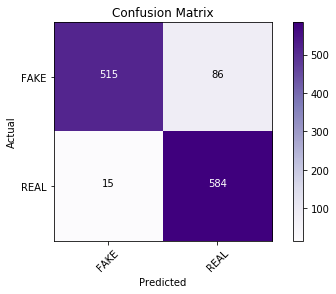

In [47]:
m6 = MultinomialNB(alpha=0.01)

fit_model(hash_train, hash_test, m6, cm=True)

For now we will stick with tkdf since we get better results

In [48]:
# TFIDF data set
from sklearn.linear_model import PassiveAggressiveClassifier

m7 = PassiveAggressiveClassifier(n_iter=50, random_state=69)

fit_model(tfidf_train, tfidf_test, m7)

accuracy:   0.949


The PassiveAggressive gave us a great score. Let us see if we can make it better.

In [49]:
# create function
def find_C(X_train, X_test, model):
    '''function to find best C'''
    C = [0.001, 0.01, 0.1, 1, 10, 100] # the most commonly used that I have seen so far
    best_C_score = 0
    for c in C:
        C_model = model(C=c)
        C_model.fit(X_train, y_train)
        pred = C_model.predict(X_test)
        score = metrics.accuracy_score(y_test, pred)
        if score > best_C_score:
            clf = C_model
        print("C: {:.2f} Score: {:.6f}".format(c, score))

In [50]:
find_C(count_train, count_test, PassiveAggressiveClassifier)

C: 0.00 Score: 0.900833
C: 0.01 Score: 0.910833
C: 0.10 Score: 0.900833
C: 1.00 Score: 0.880000
C: 10.00 Score: 0.882500
C: 100.00 Score: 0.908333


accuracy:   0.951


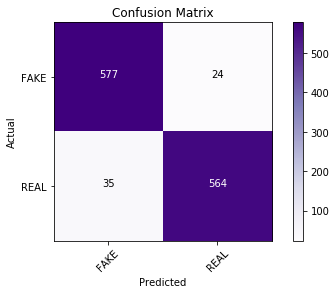

In [51]:
m7 = PassiveAggressiveClassifier(n_iter=50, C=.06, random_state=69) # this worked the best after trying a few

fit_model(tfidf_train, tfidf_test, m7, cm=True)

accuracy:   0.948


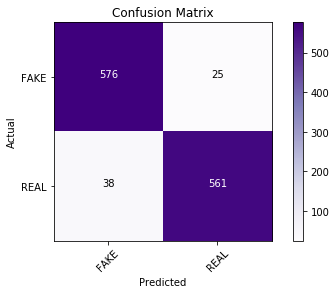

In [52]:
from nltk.classify import SklearnClassifier
from sklearn.svm import LinearSVC

m8 = LinearSVC(C=10, random_state=69) # tried enforcing penalty 1 and got a better score

fit_model(tfidf_train, tfidf_test, m8, cm=True)

So I tried multiple other by using all three different vectorizers and applying them to NB, Passive Aggressive and finally SVM. These last two models gave me the best score so I will use a VotingClassifier to see if I can use the results from both models. I will use cross-validation on the full data set to avoid overfitting and see a much more realistic score.

In [53]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.6, token_pattern=white_space, ngram_range=unigrams, analyzer='word') # use white space again, unigrams works best
tfidf_train_full = tfidf_vectorizer.fit_transform(train['text']) 
tfidf_test_full = tfidf_vectorizer.transform(test['text'])

# print the feature names 
print(tfidf_vectorizer.get_feature_names()[:20]) # first 20 features

['!', '!!', '!!!', '!!!”', '!!?', '!?', '!f', '!”', '!”)', '"', '""clearly', '"#imwithyou,"', '"#muslimlivesmatter"', '"$100,000?', '"$50', '"$66', '"\'i', '"\'it\'s', '"\'knowing', '"\'stronger']


In [54]:
tfidf_df = pd.DataFrame(tfidf_train_full.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.head()

,!,!!,!!!,!!!”,!!?,!?,!f,!”,!”),"""",...,🇺🇸,🌍💚☮️,🎃,😀,😂,😉,😍,😭,😳,🙂
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


First we have to convert the label column into binary and then change it back after the model.

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_label = le.fit_transform(label)

Accuracy: 0.94223 (+/- 0.01) [Passive Aggressive]
Accuracy: 0.94098 (+/- 0.01) [SVM]
Accuracy: 0.94173 (+/- 0.01) [Ensemble]


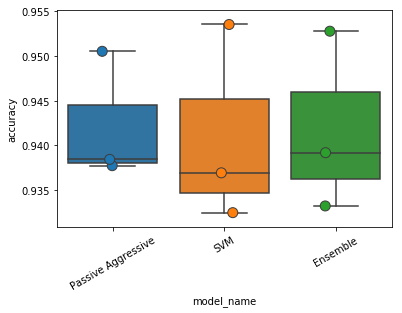

In [64]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
import seaborn as sns


# StratifiedKFold for cross-validation
kfold = StratifiedKFold(n_splits=3, random_state=69, shuffle=True)

# implement the VotingClassifier
VC = VotingClassifier(estimators=[('pa', m7), ('svm', m8)], voting='hard')

# create a df to plot the scores
VC_df = pd.DataFrame(index=range(3 * 3))

preds = []
for clf, lab in zip([m7, m8, VC], ['Passive Aggressive', 'SVM', 'Ensemble']):
    model_name = lab
    scores = cross_val_score(clf, tfidf_train_full, binary_label, cv=kfold, scoring='accuracy') 
    print("Accuracy: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), lab))
    for fold, accuracy in enumerate(scores):
        preds.append((lab, fold, accuracy))

VC_df = pd.DataFrame(preds, columns=['model_name', 'fold', 'accuracy'])

# plot the results
sns.boxplot(x='model_name', y='accuracy', data=VC_df)
sns.stripplot(x='model_name', y='accuracy', data=VC_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=1)
plt.xticks(rotation=30)
plt.show()

The VotingClassifier gave us a worse ensemble score than model 7, which gave us a 94.2% accuracy. So we will go with model 7 for the prediction.

In [65]:
prediction = m7.fit(tfidf_train_full, label).predict(tfidf_test_full)

test_id = test.index
submission = pd.DataFrame(test_id, columns=['ID'])
submission['label'] = prediction
submission.to_csv('fake_news_submission.csv', index = False)

Here we can look at which tokens were most linked towards real and which more towards fake.

In [66]:
features = tfidf_vectorizer.get_feature_names()

In [67]:
### Most real words
sorted(zip(m7.coef_[0], features), reverse=True)[:10]

[(4.354195827936375, '--'),
 (2.4460794681999145, 'said.'),
 (2.4103753831345514, 'said'),
 (2.371077871574678, 'debate'),
 (2.1647455682960017, 'islamic'),
 (2.0757797612146422, '—'),
 (2.066385332013124, 'gop'),
 (2.054789960700819, "it's"),
 (2.0017796978748406, 'cruz'),
 (1.989950689607499, '"i')]

In [68]:
### Most fake words
sorted(zip(m7.coef_[0], features))[:10]

[(-5.888217630979381, ','),
 (-4.120635083486181, 'october'),
 (-3.803784950763806, '.'),
 (-3.643321352940371, '2016'),
 (-3.5641535157836928, '0'),
 (-2.943257963604798, '“'),
 (-2.84251643222225, 'hillary'),
 (-2.692189692183083, ':'),
 (-2.489036624582063, 'november'),
 (-2.047523784015778, 'article')]